In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\3.concertriccir2.csv",header=None)

In [3]:
data[2].value_counts()

0.0    250
1.0    250
Name: 2, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [40]:
scaler = StandardScaler()


In [41]:
X_train_trf = scaler.fit_transform(x_train)
X_test_trf = scaler.transform(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

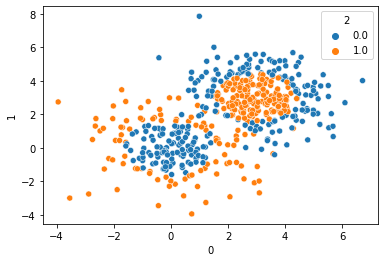

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [57]:
model = Sequential()
model.add(Dense(6,activation='tanh',input_dim=2,kernel_initializer="glorot_uniform"))
#model.add(Dropout(0.5))

model.add(Dense(6,activation='tanh',kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 18        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dropout_5 (Dropout)         (None, 6)                 0         
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer="Adam",loss="binary_crossentropy")

In [60]:
save=model.fit(x_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 2s 18ms/step - loss: 0.7945 - val_loss: 0.7042
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 0.7600 - val_loss: 0.6954
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 0.7657 - val_loss: 0.6889
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 0.7341 - val_loss: 0.6837
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.7007 - val_loss: 0.6811
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 0.7183 - val_loss: 0.6809
Epoch 7/50
36/36 [==============================] - 0s 5ms/step - loss: 0.7230 - val_loss: 0.6783
Epoch 8/50
36/36 [==============================] - 0s 6ms/step - loss: 0.6938 - val_loss: 0.6772
Epoch 9/50
36/36 [==============================] - 0s 8ms/step - loss: 0.7076 - val_loss: 0.6749
Epoch 10/50
36/36 [==============================] - 0s 6ms/step - loss: 0.7018 - val_loss: 0.6734
Epoch 11/50
36/36 

In [61]:
pred=model.predict(x_train)

15/15 [==============================] - 0s 3ms/step


In [62]:
predi=np.where(pred>0.5,1,0).flatten()

In [63]:
accuracy_score(y_train,predi)

0.6644444444444444

In [67]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 9s 2ms/step


<AxesSubplot:>

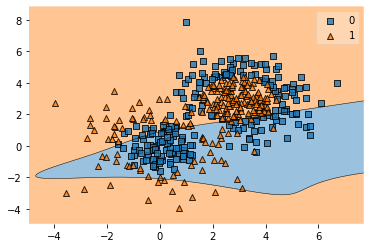

In [68]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

In [64]:
tl1=save.history["loss"]
cvl1=save.history["val_loss"]

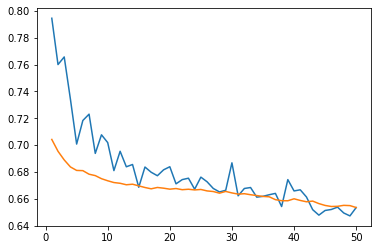

In [65]:
plt.plot(range(1,51),tl1,label="training_loss")
plt.plot(range(1,51),cvl1,label="crossval_loss")